# Interactive visualization of connectivity matrix

In [2]:

import numpy as np
import os

DATASET_DIR = os.path.expanduser('../01_data')

In [3]:
# import h5py

# with h5py.File(os.path.join(DATASET_DIR, 'conn.h5')) as f:
#     conn_matrix = np.asarray(f['connMatrix'])
    
# I = conn_matrix[0,:]
# J = conn_matrix[1,:]
# syn_num = conn_matrix[2,:]
# psd_size = conn_matrix[3,:]

# import networkx as nx




In [86]:
def neuroglancer_callback(attr, old, new):
    print('selected: ', new)


from random import random

from bokeh.layouts import row
from bokeh.models import CustomJS, ColumnDataSource, Selection
from bokeh.plotting import figure, output_notebook, show

output_notebook()

x = [random() for x in range(500)]
y = [random() for y in range(500)]

tools = ["wheel_zoom", "save", "box_select", "lasso_select", "hover", "reset"]

s1 = ColumnDataSource(data=dict(x=x, y=y))
p1 = figure(plot_width=400, plot_height=400, tools=tools, title="Select Here")
p1.circle('x', 'y', source=s1, alpha=0.6)

p1.output_backend = 'svg'
s1.on_change('data', neuroglancer_callback)

layout = row(p1)

show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html



You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html



# Inferring the best partition

In [5]:
import graph_tool as gt
from graph_tool.all import *

g = gt.load_graph(os.path.join(DATASET_DIR, 'net.graphml'))
print(g)
g

NameError: name 'gt' is not defined

In [4]:
state_ndc = gt.inference.minimize_nested_blockmodel_dl(g, deg_corr=False)
state_dc  = gt.inference.minimize_nested_blockmodel_dl(g, deg_corr=True)

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t", state_dc.entropy())
print(u"ln \u039b:\t\t\t", state_ndc.entropy() - state_dc.entropy())

# we should select the one with less discription length

Non-degree-corrected DL:	 97234.60223582207
Degree-corrected DL:	 95248.87751073232
ln Λ:			 1985.724725089749


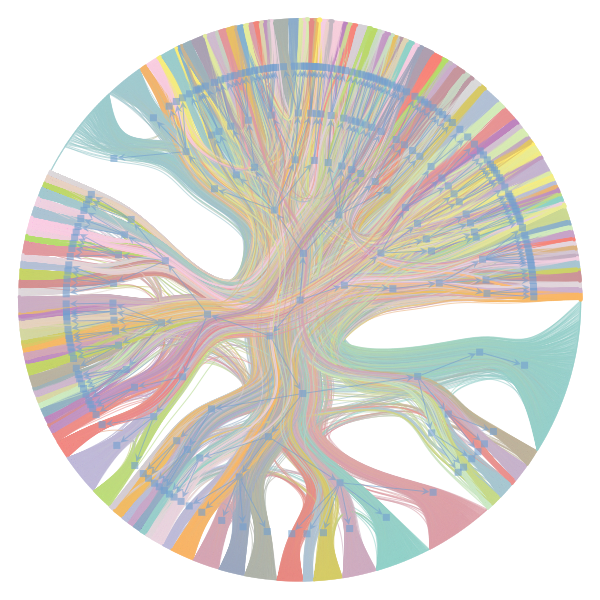

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe721121128, at 0x7fe71c5ea128>,
 <Graph object, directed, with 2136 vertices and 2135 edges at 0x7fe71c5d7160>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe71c5d7160, at 0x7fe71c5d79b0>)

In [20]:
state_ndc.draw()

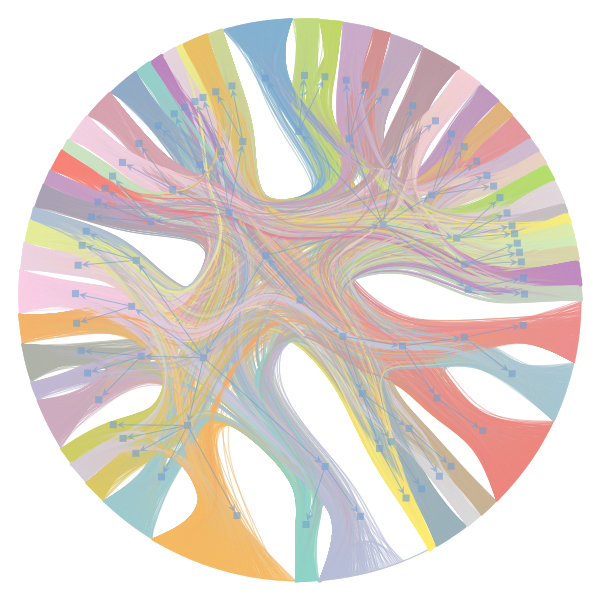

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe721121128, at 0x7fe71c5eaf60>,
 <Graph object, directed, with 1965 vertices and 1964 edges at 0x7fe71c5d7cc0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe71c5d7cc0, at 0x7fe71c5ea898>)

In [21]:
state_dc.draw()


100%|██████████| 1000/1000 [2:19:22<00:00,  8.36s/it] 


DL:	 96531.70328048836


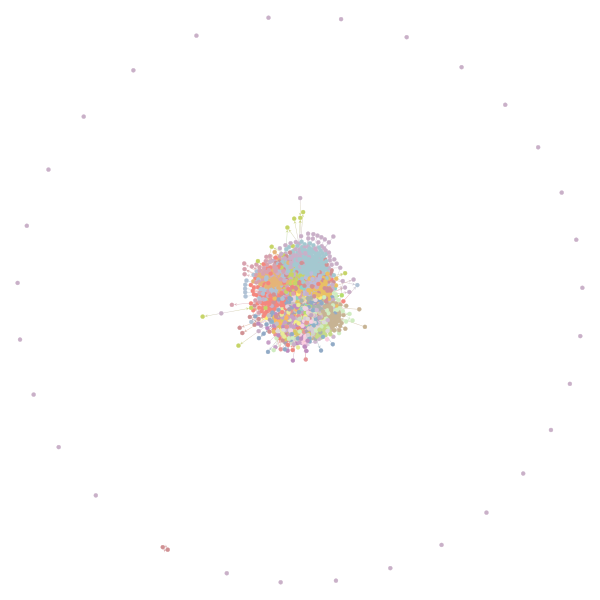

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe721121128, at 0x7fe71d97b780>

In [11]:
from tqdm import tqdm
import concurrent.futures

state_list = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    for i in tqdm(range(1000)):
        state = gt.inference.minimize_blockmodel_dl(g, deg_corr=True)
        state_list.append(state)

print('DL:\t', state.entropy())
# state.draw()

Text(0, 0.5, 'count of computation')

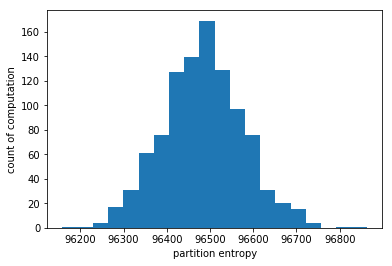

In [25]:
import matplotlib.pyplot as plt
entropy_list = np.asarray([state.entropy() for state in state_list])
plt.hist(entropy_list, bins=20)
plt.xlabel('partition entropy')
plt.ylabel('count of computation')

In [30]:
minIndex = np.argmin(entropy_list)
state = state_list[ minIndex ]
print('minimum entropy: ', state.entropy())
b = state.get_blocks()
# r = b[20]   # group membership of vertex
# print(r)
label = [i+1 for i in b]
print(label)

minimum entropy:  96158.5894919757
[1, 2, 3, 4, 5, 6, 3, 6, 7, 8, 9, 8, 10, 6, 11, 12, 19, 13, 31, 15, 1, 16, 17, 11, 18, 19, 1, 3, 9, 10, 9, 1, 20, 6, 6, 21, 18, 16, 22, 5, 20, 23, 9, 14, 11, 6, 36, 24, 3, 6, 23, 2, 36, 26, 27, 22, 6, 6, 16, 25, 18, 28, 3, 29, 20, 3, 4, 6, 12, 8, 18, 3, 30, 13, 29, 1, 7, 31, 3, 23, 12, 20, 1, 30, 19, 20, 22, 3, 6, 30, 1, 11, 4, 3, 28, 36, 1, 3, 31, 18, 7, 3, 3, 31, 20, 16, 10, 32, 4, 9, 10, 6, 7, 6, 19, 7, 3, 1, 30, 22, 9, 3, 3, 33, 34, 35, 6, 28, 16, 7, 1, 28, 9, 6, 16, 33, 6, 1, 1, 18, 28, 17, 36, 28, 3, 19, 3, 7, 1, 6, 33, 6, 3, 21, 3, 8, 33, 22, 14, 3, 10, 14, 26, 8, 7, 37, 36, 37, 3, 34, 24, 5, 18, 12, 20, 38, 6, 16, 23, 9, 31, 9, 3, 28, 1, 17, 8, 24, 18, 3, 3, 36, 6, 31, 23, 21, 24, 6, 32, 5, 23, 8, 3, 11, 7, 1, 6, 13, 6, 12, 12, 36, 1, 18, 6, 18, 5, 11, 18, 17, 12, 29, 1, 32, 7, 6, 4, 30, 3, 8, 1, 12, 12, 9, 6, 20, 4, 26, 28, 10, 20, 1, 6, 23, 27, 9, 38, 5, 4, 18, 31, 3, 10, 28, 5, 28, 33, 10, 3, 32, 3, 28, 27, 3, 19, 9, 5, 2, 16, 33, 6, 20, 1,

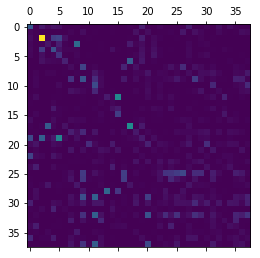

In [14]:
import matplotlib.pyplot as plt

e = state.get_matrix()

plt.matshow(e.todense())
plt.savefig("fig/edge_counts.svg")

# Hierachical partitions

In [15]:
state = gt.inference.minimize_nested_blockmodel_dl(g)
print('DL:\t', state.entropy())
state.print_summary()

# state.draw()
state.draw(output="fig/hsbm-fit.svg")

DL:	 95122.19885014571
l: 0, N: 1878, B: 73
l: 1, N: 73, B: 32
l: 2, N: 32, B: 10
l: 3, N: 10, B: 3
l: 4, N: 3, B: 1


(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe721121128, at 0x7fe71c6396d8>,
 <Graph object, directed, with 1997 vertices and 1996 edges at 0x7fe71c66c6a0>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe71c66c6a0, at 0x7fe71c623b00>)

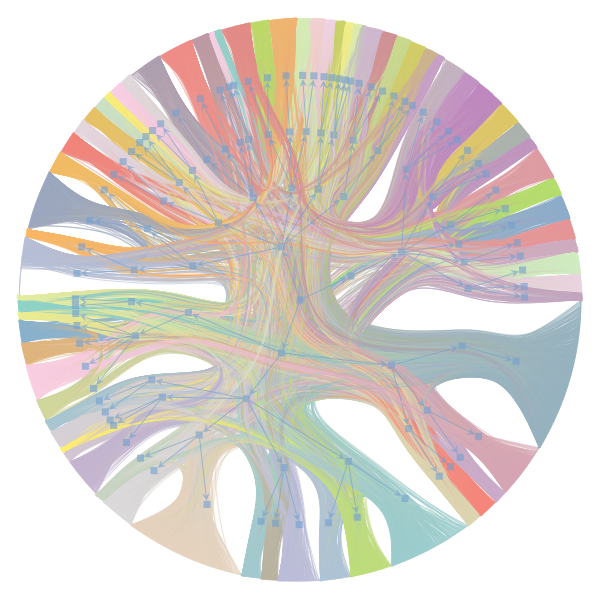

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe721121128, at 0x7fe76b8bca90>,
 <Graph object, directed, with 1997 vertices and 1996 edges at 0x7fe71c623470>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe71c623470, at 0x7fe71c623d68>)

In [17]:
state.draw()

In [18]:
levels = state.get_levels()
b = levels[0].get_blocks()
print([i+1 for i in b])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 8, 14, 15, 16, 17, 18, 19, 20, 21, 22, 14, 23, 16, 24, 7, 11, 25, 11, 24, 26, 3, 3, 27, 28, 29, 8, 5, 4, 30, 11, 31, 14, 8, 32, 33, 26, 6, 34, 35, 36, 12, 37, 6, 24, 38, 21, 39, 40, 41, 42, 43, 1, 7, 44, 4, 32, 10, 28, 7, 45, 29, 43, 24, 9, 46, 42, 47, 48, 34, 4, 33, 13, 6, 49, 42, 24, 50, 24, 14, 44, 42, 11, 32, 24, 51, 46, 28, 9, 42, 42, 14, 52, 21, 25, 17, 44, 11, 25, 11, 9, 3, 45, 53, 42, 24, 50, 17, 11, 7, 42, 10, 54, 20, 3, 41, 21, 9, 24, 55, 11, 38, 21, 10, 3, 1, 24, 23, 55, 12, 36, 15, 52, 24, 42, 9, 24, 24, 20, 3, 42, 56, 42, 49, 18, 24, 31, 42, 13, 21, 22, 57, 9, 58, 41, 59, 42, 7, 60, 26, 23, 48, 55, 61, 6, 21, 34, 15, 62, 19, 42, 41, 1, 12, 49, 15, 44, 42, 51, 36, 8, 46, 59, 56, 37, 3, 22, 63, 18, 18, 64, 14, 23, 24, 3, 36, 8, 65, 48, 17, 24, 23, 6, 40, 51, 14, 28, 12, 66, 67, 24, 68, 9, 8, 53, 13, 42, 10, 24, 66, 32, 8, 24, 52, 44, 33, 69, 49, 4, 24, 3, 47, 37, 11, 68, 52, 44, 23, 33, 42, 59, 41, 5, 55, 59, 13, 42, 22, 7, 41, 37,

In [ ]:
import numpy as np
bs = state.get_bs()                     # Get hierarchical partition.
bs += [np.zeros(1)] * (10 - len(bs))    # Augment it to L = 10 with
                                        # single-group levels.

state = state.copy(bs=bs, sampling=True)

# Now we run 1000 sweeps of the MCMC

dS, nattempts, nmoves = state.mcmc_sweep(niter=1000)

print("Change in description length:", dS)
print("Number of accepted vertex moves:", nmoves)

# We will first equilibrate the Markov chain
gt.inference.mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

pv = [None] * len(state.get_levels())

def collect_marginals(s):
   global pv
   pv = [sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

# Now we collect the marginals for exactly 100,000 sweeps
gt.inference.mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10), callback=collect_marginals)

# Now the node marginals for all levels are stored in property map
# list pv. We can visualize the first level as pie charts on the nodes:
state_0 = state.get_levels()[0]
state_0.draw(g, vertex_shape="pie", vertex_pie_fractions=pv[0],
             edge_gradient=None, output="fig/lesmis-nested-sbm-marginals.svg")

Change in description length: -363.4207706438459
Number of accepted vertex moves: 254114


In [29]:
state_0.draw(g, vertex_shape="pie", vertex_pie_fractions=pv[0], edge_gradient=None)

TypeError: draw() takes 1 positional argument but 2 were given